In [1]:
# ORDINAL ENCODING : 

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame({"Size":["s","m","l","xl","s","m","l","s","s","l","xl","m"]})

In [4]:
df

,Size
0,s
1,m
2,l
3,xl
4,s
5,m
6,l
7,s
8,s
9,l


In [5]:
df.head(3)

,Size
0,s
1,m
2,l


In [6]:
ord_data = [["s","m","l","xl"]]

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
oe = OrdinalEncoder(categories=ord_data)
oe.fit(df[["Size"]])

OrdinalEncoder(categories=[['s', 'm', 'l', 'xl']])

In [9]:
oe.transform(df[["Size"]])

array([[0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [3.],
       [1.]])

In [10]:
df["Size_en"] = oe.transform(df[["Size"]])

In [11]:
df

,Size,Size_en
0,s,0.0
1,m,1.0
2,l,2.0
3,xl,3.0
4,s,0.0
5,m,1.0
6,l,2.0
7,s,0.0
8,s,0.0
9,l,2.0


In [12]:
ord_data1 = {"s":0,"m":1,"l":2,"xl":3}

In [13]:
df["Size"].map(ord_data1)

0     0
1     1
2     2
3     3
4     0
5     1
6     2
7     0
8     0
9     2
10    3
11    1
Name: Size, dtype: int64

In [14]:
# DATA KO STORE KRNA HA:
df["Size_en_map"] = df["Size"].map(ord_data1)

In [15]:
df

,Size,Size_en,Size_en_map
0,s,0.0,0
1,m,1.0,1
2,l,2.0,2
3,xl,3.0,3
4,s,0.0,0
5,m,1.0,1
6,l,2.0,2
7,s,0.0,0
8,s,0.0,0
9,l,2.0,2


In [16]:
df = pd.read_csv("Loan_data.csv")

In [17]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [19]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [20]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [21]:
df["Property_Area"].fillna(df["Property_Area"].mode()[0])

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [22]:
df["Property_Area"].fillna(df["Property_Area"].mode()[0],inplace=True)

In [23]:
en_data_ord = [['Urban', 'Rural', 'Semiurban']]

In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
oen = OrdinalEncoder(categories=en_data_ord)

In [26]:
df["Property_Area"] = oen.fit_transform(df[["Property_Area"]])

In [27]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,0.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,0.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,0.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,0.0,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,0.0,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,0.0,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,2.0,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,0.0,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,2.0,N


In [28]:
len("Property_Area")

13

In [29]:
# OUTLIERS :

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("Loan_data.csv")

In [32]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [33]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [35]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


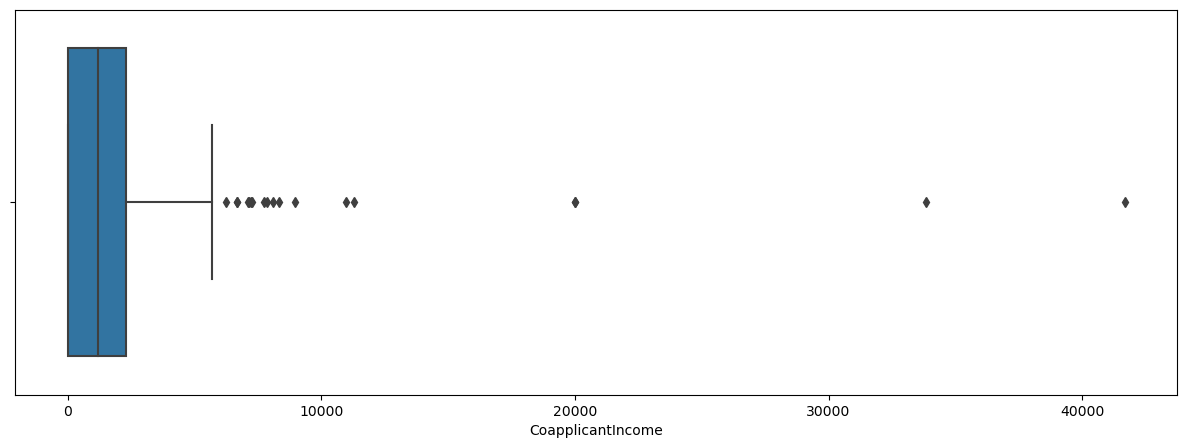

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "CoapplicantIncome",data=df)
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


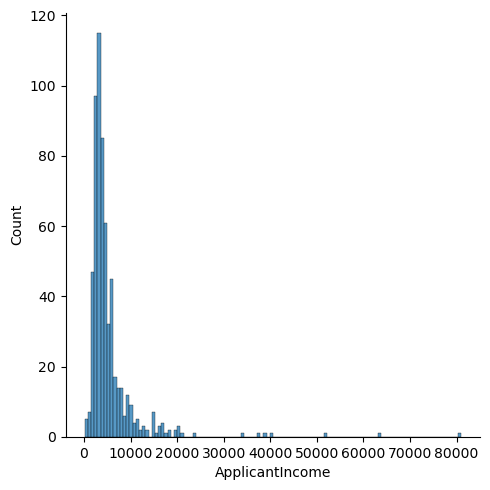

In [37]:
sns.displot(df["ApplicantIncome"])
plt.show()

In [ ]:
# detect the outlier :

In [41]:
df.shape

(614, 13)

In [43]:
q1 = df["CoapplicantIncome"].quantile(0.25)
q3 = df["CoapplicantIncome"].quantile(0.75)
q3

2297.25

In [44]:
IQR = q3-q1

In [46]:
min_range =q1 -(1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range , max_range

(-3445.875, 5743.125)

In [ ]:
# ORDINAL DATA SE REMOVE KRNA HA OUTLIER :

In [53]:
new_dataset = df[df["CoapplicantIncome"]<=max_range]

In [54]:
new_dataset.shape

(596, 13)

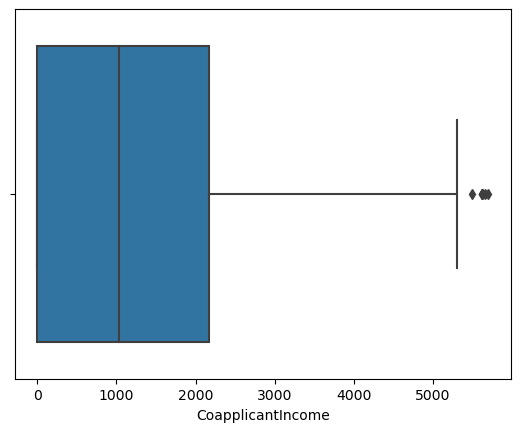

In [56]:
sns.boxplot(x = "CoapplicantIncome",data=new_dataset)
plt.show()

In [ ]:
# OUTLIER REMOVAL USING Z SCORE :

In [ ]:
# Z SCORE :
# FORMULA = (X-MUE)/SIGMA

In [57]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# identifier the outlier :

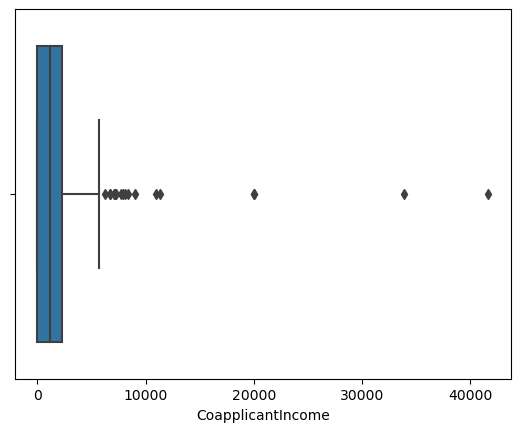

In [59]:
sns.boxplot(x = "CoapplicantIncome",data=df)
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


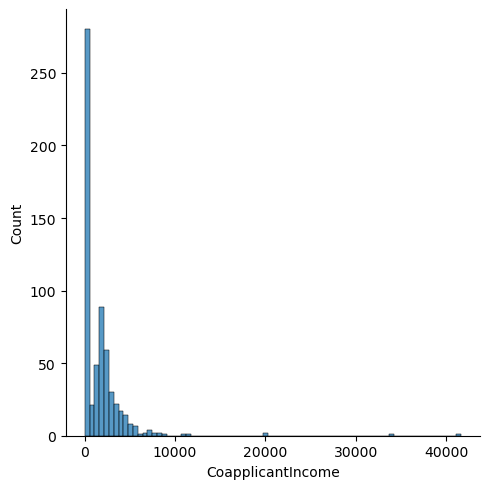

In [60]:
sns.displot(df["CoapplicantIncome"])
plt.show()

In [65]:
min_range = df["CoapplicantIncome"].mean()-3*df["CoapplicantIncome"].std()
max_range = df["CoapplicantIncome"].mean()+3*df["CoapplicantIncome"].std()

In [66]:
min_range

-7157.499309645475

In [67]:
max_range

10399.990905699677

In [71]:
new_data = df[df["CoapplicantIncome"]<=max_range]
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


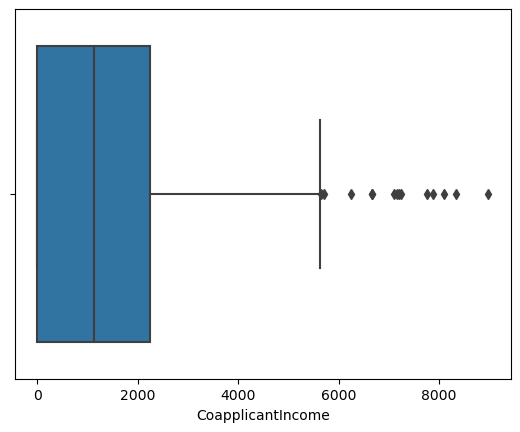

In [72]:
sns.boxplot(x = "CoapplicantIncome",data=new_data)
plt.show()

In [73]:
z_score = (df["CoapplicantIncome"] - df["CoapplicantIncome"])/(df["CoapplicantIncome"].std())

In [74]:
z_score

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
609    0.0
610    0.0
611    0.0
612    0.0
613    0.0
Name: CoapplicantIncome, Length: 614, dtype: float64

In [75]:
z_score>3

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: CoapplicantIncome, Length: 614, dtype: bool

In [79]:
df["z_score"] = z_score

In [80]:
df[df["z_score"]<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.0
